# Probability Distributions

Probability distributions can be a useful way to describe data and create predictive functions. While there are a large number of formal statistical distributions, most use cases can be handled by using a manageable number of common distributions. The following cheat sheet provides an overview of these distributions, how to decide on which distribution is appropriate for a given data set, and how to use python to create an estimator function for your data using the generalized PDF function of a distribution. 

## Common Distributions and Use Cases

### Discrete Distributions
* [Bernoulli Distribution](https://en.wikipedia.org/wiki/Bernoulli_trial)
    * _Use Case_ - Showing the properties of a binary outcome (e.g. a coin toss or win/loss)
    * The probability density function is:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/80d45357d81684dfbff51e5d56e3fc2363b25a16)  
  <br>

* [Uniform Distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)
    * _Use Case_ - When each discrete outcome has the same 1/n probability (e.g. rolling a fair die)
    * The probability density function is 1/n  
  <br>

* [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution)
    * _Use Case_ - Showing the probability of a binary outcome over a given number of tries
    * _Example_ - Probability of getting x heads when tossing a coin 10 times
    * The probability density function is:
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/8f1eb36a9ece93abf99484b655139921da8a843b)  
<br>

* [Hypergeometric Distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)
    * _Use Case_ - Similar to Binomial, but once an observation is noted it's taken out of the population
    * _Example_ - Given a box filled with red and blue balls, the likelihood that you would pull out x red balls out of a sample of 20, _assuming you don't put the red balls back in the box_. 
    * The probability density function is:
![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/ddcbe164abf391cb48b70090c9a3f20038dd987b)
    where  
    <br>
    * N is the population size,
    * K is the number of success states in the population,
    * n is the number of draws,
    * k is the number of observed successes  
   <br>

* [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution)
    * _Use Case_ - The distribution of the number of times something happens in a predefined window of time. Typically this is used for estimating the number times something happens in a second, minute, hour, etc.
    * _Example_ - The number of customers who come into a restaurant every 5 minutes
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/b75025fd6426768c49ec751b5327b2b996ebe221)
    where  
    <br>
    * lambda  is the average number of events per interval
    * e is the number 2.71828... (Euler's number) the base of the natural logarithms
    * k takes values 0, 1, 2, …
    * k! = k × (k − 1) × (k − 2) × … × 2 × 1 is the factorial of k.  
    * mean is $\lambda$ and variance is $\lambda$  
    <br>

* [Geometric Distribution](https://en.wikipedia.org/wiki/Geometric_distribution)
    * _Use Case_ - Predicting the likelihood of a successful outcome over a number of tries. "How many failures until a success"?
    * _Example_ - The number of miles you'll drive before you get into an accident
    * The probability density function is:  
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/5526852032ac99a1ecfaa85c89cc58ce2d2daf71)
    for k = 1, 2, 3, ...  
    
    The above form of geometric distribution is used for modeling the number of trials up to and including the first success. By contrast, the following form of the geometric distribution is used for modeling the number of failures until the first success:  
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/f433fb41a422857b6dd796a5b21ad1a3afa5a88b)
    for k = 0, 1, 2, ...  
    * $p$ represents the probability of success  
    <br>

* [Negative Binomial Distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution)
    * _Use Case_ - A generalization of the geometric distribution, this is the number of successes until x failures have occurred (as opposed to 1 in the Geometric Distribution)
    * _Example_ - The number of miles you'll drive before you get into two accidents
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/98e85ec5c18d6e0156087639755336295bfb72fd)
    where "k" is the number of successes, "r" is the number of failures, and "p" is the probability of success. Here the quantity in parentheses is the binomial coefficient, and is equal to
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/71fdd77f30146311b88e04be33e85b2118430ec7)  

### Continuous Distributions
* [Exponential Distribution](https://en.wikipedia.org/wiki/Exponential_distribution)
    * _Use Case_ - Similar to a Geometric Distribution, but for continuous values.  
        - related to the Poisson distribution; using, in fact, the same lambda parameter.
    * _Example_ - Amount of time until someone responds to a ZenDesk ticket
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/eae9c60f97cd178d2aee9daf1f5b9e90698186d5)
    where  
    * λ is the rate parameter
    * x > 0
    * e is the number 2.71828 …, the base of the natural logs 

* [Weibull Distribution](https://en.wikipedia.org/wiki/Weibull_distribution)
    * _Use Case_ - Similar to the exponential distribution, this is generalized to account for changing rates of a given outcome over time, and is primarily used to model and explain rates of failure over time.
    * _Example_ - The likelihood that the O-ring on a rocket component will wear out x-milliseconds into launch.
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/847f7f8870ffa9eabda2b09dc503ff4cb7753695)
    where k > 0 is the shape parameter and λ > 0 is the scale parameter of the distribution. Its complementary cumulative distribution function is a stretched exponential function.  
    <br>    

* [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)
    * _Use Case_ - When your data is distributed normally (duh). Specifically, when your data is centered around a given value, and has limited or no skewness or kurtosis.
    * _Example_ - Height
    * The probability density function is:  
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/6404a4c69c536278a5933085f0d5f4a9ca9f2b2a)
    * mu  is mean or expectation of the distribution (and also its median and mode).
    * sigma  is standard deviation
    * sigma ^2 is variance  
    <br>  

* [Cauchy Distribution (aka Lorentz distribution)](https://en.wikipedia.org/wiki/Cauchy_distribution)
    * _Description_ - Similar to a normal distribution, but has higher kurtosis and allows for more extreme outliers
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/cebade496753f1664a6afd9c260c993023c03b3b)  
    where x0 is the location parameter, specifying the location of the peak of the distribution, and γ is the scale parameter which specifies the half-width at half-maximum (HWHM), alternatively 2γ is full width at half maximum (FWHM).  
    <br> 

* [Student's T Distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
    * _Description_ - The student's T Distribution is similar to a normal distribution, except that it has slightly more kurtosis. 
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/e293ade2e368fb5618602ddc310ef149b88c1496)  
    <br>

* [Triangular Distribution](https://en.wikipedia.org/wiki/Triangular_distribution)
    * _Use Case_ - Whenever you have continuous values that are bounded on either end, but still converge on some central value. Note that value bounds can also be imposed on other continuous functions. 
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/22e4e98ad8069ea39f61fe2f0be5b83b47f631bc)  
    where a is the lower limit, b is the upper limit, and c is the mode.

* [Log-normal Distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)
    * _Description_ - Can be used when the logs of your data are normally distributed. 
    * _Use Case_ - This can be used when your data is skewed positive.
    * The probability density function is:
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/d363c502fce3b2b4e0d00d4db32aa197301385ca)

* [Chi-Squared Distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution)
    * _Description_ - The distribution of the sum of squares of normally distributed values. 
    * The probability density function is:  
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/1f4f10b17e2374a4f6043098386b9017e1b8be17)

* [Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution)
    * _Use Case_ - This can be used when your data is skewed negative. This PDF is highly maleable. 
    * The probability density function is:  
    ![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/b32815268d9d70b0b9fbb8fd5a25be7bc640aa50)  
    where the gamma function of x is (x-1)!

### Probability Functions
![alt text](http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png "Probability Functions")

## Deciding on a Probability Decision

First, create a histogram and calculate the moments (basic descriptive stats) of your dataset.

Second, answer the following questions:  
    1 - Is the data discrete or continuous?  
    2 - Is the data symmetric or asymmetric?  
    3 - Are there upper or lower limits on the data?  
    4 - What is the frequency of extreme values?  

By taking the outcome from those steps and pairing it with our knowledge about the distributions up above, we can probably get a sense of what probability distributions are most appropriate for your data. Here's a handy decision tree:  
![alt text](https://2.bp.blogspot.com/-SpjgitfNMb0/TteevRR_Y2I/AAAAAAAAAFQ/IZgd32z2AI8/s1600/distributions.png "Distributional Choices")

## Coding Example: Creating Estimator Functions from Probability Distributions

If we can correctly identify the probability distribution of our data, we can actually fit the corresponding generalized equations against our data. Assuming we're using a distribution function that's appropriate for the data, we may be able to use the resulting function to estimate future outcomes. 

In [1]:
# import the things
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import math
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


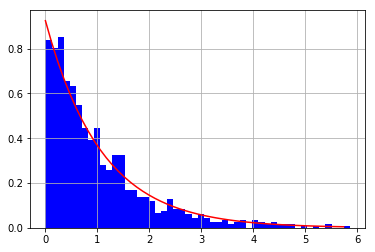

In [6]:
# Exponential Distribution Example
#---------------------------------
# create a sample data set
y = np.random.exponential(1, 1000)
y = pd.Series(y)
#y.hist(bins=30, normed=True)

# generate your model inputs / outputs using np.histogram
# note that this method produces a division vector that is one item longer than the count vector
count, division = np.histogram(y, bins=50, normed=True)

# Define the generalized exponential PDF function 
def exp_func(x, b):
    return b* np.exp(-1*(x*b))
    
# fit the curve using scikit.optimize.curve_fit
fitParams, fitCov = curve_fit(exp_func, division[0:len(division)-1], count)

# This is a pretty tricky function, so be sure to read the documentation if
# you're going to use it! Note that you have to do the division indexing because
# it's always going to be one element too long. 

# evaluate the performance of your estimator function
x = division[0:len(division)-1]
y.hist(bins=50, normed=True, color='b')
plt.plot(x, exp_func(x, fitParams[0]), color='r')

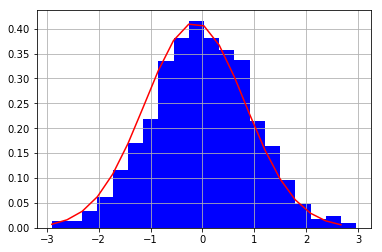

In [3]:
# Normal Distribution Example
#-----------------------------

# create a sample data set
y = np.random.normal(0, 1, 1000)
y = pd.Series(y)
y.hist(bins=20, normed=True)

# generate your model inputs / outputs using np.histogram
count, division = np.histogram(y, bins=20, normed=True)

# define the normal distribution PDF function
def normdist_func(x, m, s):
    return np.exp((-1*(x-m)**2)/(2*s**2)) / (s*math.sqrt(2*math.pi))
    
# fit the curve using scikit.optimize.curve_fit
fitParams, fitCov = curve_fit(normdist_func, division[0:len(division)-1], count)

# evaluate the performance of your estimator function
x = division[0:len(division)-1]
y.hist(bins=20, normed=True, color='b')
plt.plot(x, normdist_func(x, fitParams[0], fitParams[1]), color='r')

## Additional Resources  
- https://docs.scipy.org/doc/numpy/reference/routines.random.html
- http://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm
- http://www.math.wm.edu/~leemis/chart/UDR/UDR.html
- http://people.stern.nyu.edu/adamodar/New_Home_Page/StatFile/statdistns.htm